拿加權指數資料去訓練AE

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [20]:
# 讀取 CSV 檔案
file_path = "臺灣加權指數歷史數據.csv"
df = pd.read_csv(file_path)
print(df.head())
# 假設我們要使用數值型的列來做 Autoencoder
df = df.select_dtypes(include=[np.number]).dropna()

print(df.head())

          日期        收市        開市         高         低    成交量   升跌（%）
0  2025-2-13  23399.41  23263.28  23413.10  23206.45  3.60B   0.47%
1  2025-2-12  23289.75  23449.31  23528.61  23289.75  3.16B  -0.40%
2  2025-2-11  23384.05  23321.92  23485.51  23289.76  2.96B   0.57%
3  2025-2-10  23252.14  23421.77  23448.16  23163.85  2.71B  -0.96%
4   2025-2-7  23478.27  23289.97  23478.27  23254.17  2.67B   0.69%
         收市        開市         高         低
0  23399.41  23263.28  23413.10  23206.45
1  23289.75  23449.31  23528.61  23289.75
2  23384.05  23321.92  23485.51  23289.76
3  23252.14  23421.77  23448.16  23163.85
4  23478.27  23289.97  23478.27  23254.17


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = "臺灣加權指數歷史數據.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.dtypes)


# 轉換日期為數字格式
df['日期'] = pd.to_datetime(df['日期'])  # 轉換為 datetime 類型
df['year'] = df['日期'].dt.year
df['month'] = df['日期'].dt.month
df['day'] = df['日期'].dt.day
df['day_of_week'] = df['日期'].dt.dayofweek  # 0=星期一, 6=星期日

# 轉換成交量 (3.60B → 3.60 * 1e9)
df['成交量'] = df['成交量'].str.replace('B', '').astype(float) * 1e9

# 轉換漲跌百分比 (0.69% → 0.0069)
df['升跌（%）'] = df['升跌（%）'].str.replace('%', '').astype(float) / 100


# 列出所有需要轉換為 float 的欄位
float_columns = ['收市', '開市', '高', '低', '成交量', '升跌（%）']

# 移除 `,` 並轉換為 float
for col in float_columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)



# 移除原始日期欄位
df.drop(columns=['日期'], inplace=True)

# 確保所有數據都是數值型
print(df.dtypes)
print(df.head())

# 進行標準化處理
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.values)

print("標準化後的數據:")
print(data_scaled[:5])
# 轉換為 PyTorch Tensor
import torch
data_tensor = torch.tensor(data_scaled, dtype=torch.float32)

# 查看處理後的數據形狀
print("數據張量形狀:", data_tensor.shape)


          日期        收市        開市         高         低    成交量   升跌（%）
0  2025-2-13  23399.41  23263.28  23413.10  23206.45  3.60B   0.47%
1  2025-2-12  23289.75  23449.31  23528.61  23289.75  3.16B  -0.40%
2  2025-2-11  23384.05  23321.92  23485.51  23289.76  2.96B   0.57%
3  2025-2-10  23252.14  23421.77  23448.16  23163.85  2.71B  -0.96%
4   2025-2-7  23478.27  23289.97  23478.27  23254.17  2.67B   0.69%
日期        object
收市       float64
開市       float64
高        float64
低        float64
成交量       object
升跌（%）     object
dtype: object
收市             float64
開市             float64
高              float64
低              float64
成交量            float64
升跌（%）          float64
year             int32
month            int32
day              int32
day_of_week      int32
dtype: object
         收市        開市         高         低           成交量   升跌（%）  year  month  \
0  23399.41  23263.28  23413.10  23206.45  3.600000e+09  0.0047  2025      2   
1  23289.75  23449.31  23528.61  23289.75  3.160000e+09

In [22]:
print(torch.isnan(data_tensor).sum())  # NaN 個數
print(torch.isinf(data_tensor).sum())  # 無窮大個數


tensor(0)
tensor(0)


In [23]:
nan_rows = torch.any(torch.isnan(data_tensor), dim=1)
print("含 NaN 的行索引:", torch.nonzero(nan_rows))
print("含 NaN 的數據:", data_tensor[nan_rows])


含 NaN 的行索引: tensor([], size=(0, 1), dtype=torch.int64)
含 NaN 的數據: tensor([], size=(0, 10))


Epoch [1/100], Loss: 1.6807
Epoch [2/100], Loss: 0.1902
Epoch [3/100], Loss: 0.3337
Epoch [4/100], Loss: 2.0993
Epoch [5/100], Loss: 1.7638
Epoch [6/100], Loss: 0.1297
Epoch [7/100], Loss: 0.2625
Epoch [8/100], Loss: 0.5181
Epoch [9/100], Loss: 0.6882
Epoch [10/100], Loss: 0.3133
Epoch [11/100], Loss: 0.3796
Epoch [12/100], Loss: 0.5622
Epoch [13/100], Loss: 0.0649
Epoch [14/100], Loss: 0.2643
Epoch [15/100], Loss: 0.0530
Epoch [16/100], Loss: 0.5158
Epoch [17/100], Loss: 0.4275
Epoch [18/100], Loss: 0.2973
Epoch [19/100], Loss: 0.0517
Epoch [20/100], Loss: 0.3458
Epoch [21/100], Loss: 0.0478
Epoch [22/100], Loss: 0.2035
Epoch [23/100], Loss: 0.3145
Epoch [24/100], Loss: 0.0404
Epoch [25/100], Loss: 0.1728
Epoch [26/100], Loss: 0.2640
Epoch [27/100], Loss: 0.4243
Epoch [28/100], Loss: 0.1369
Epoch [29/100], Loss: 0.4477
Epoch [30/100], Loss: 0.4848
Epoch [31/100], Loss: 0.2531
Epoch [32/100], Loss: 0.0568
Epoch [33/100], Loss: 0.8220
Epoch [34/100], Loss: 0.6243
Epoch [35/100], Loss: 0

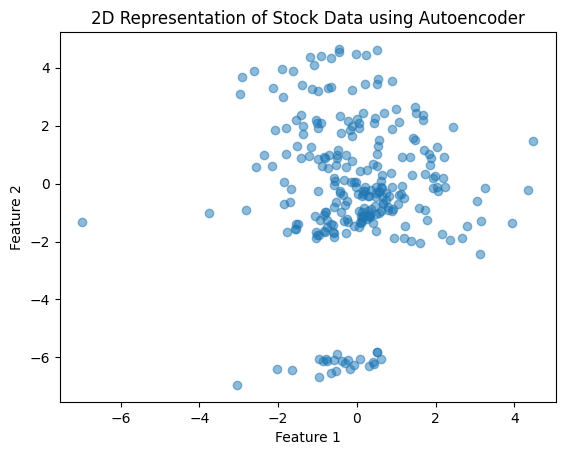

In [25]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 設定 batch size
batch_size = 32
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 定義 Autoencoder
class AutoEncoder(nn.Module):
    def __init__(self, input_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  # 壓縮到 2 維
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)  # 重建原始輸入
        )

    def forward(self, x):
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, z

# 初始化模型
input_dim = data_tensor.shape[1]  # 現在的特徵數
model = AutoEncoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    for batch in dataloader:
        x = batch[0].to(device)
        optimizer.zero_grad()
        x_reconstructed, _ = model(x)
        loss = criterion(x_reconstructed, x)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 提取 2D 特徵
model.eval()
encoded_data = model.encoder(data_tensor.to(device)).detach().cpu().numpy()

# 可視化 2D 壓縮後的數據
import matplotlib.pyplot as plt
encoded_df = pd.DataFrame(encoded_data, columns=["Feature1", "Feature2"])
plt.scatter(encoded_df["Feature1"], encoded_df["Feature2"], alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Representation of Stock Data using Autoencoder")
plt.show()


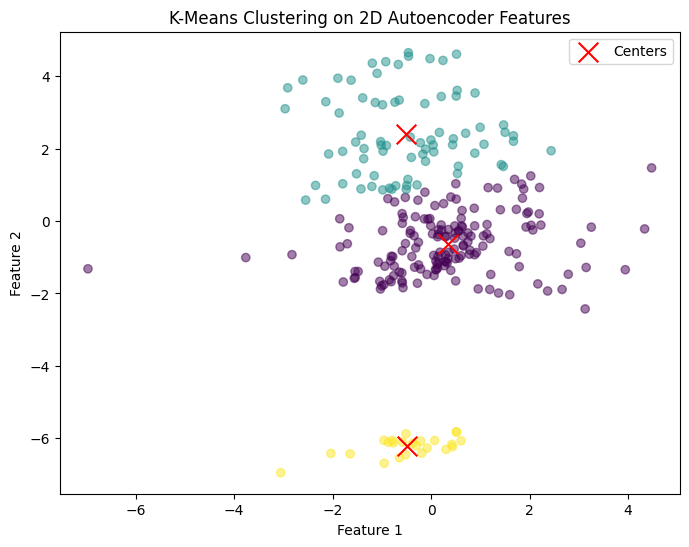

In [26]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 進行 K-Means 分群
num_clusters = 3  # 你可以嘗試不同數值
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(encoded_data)  # 取得每個點的群集標籤

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering on 2D Autoencoder Features")
plt.legend()
plt.show()


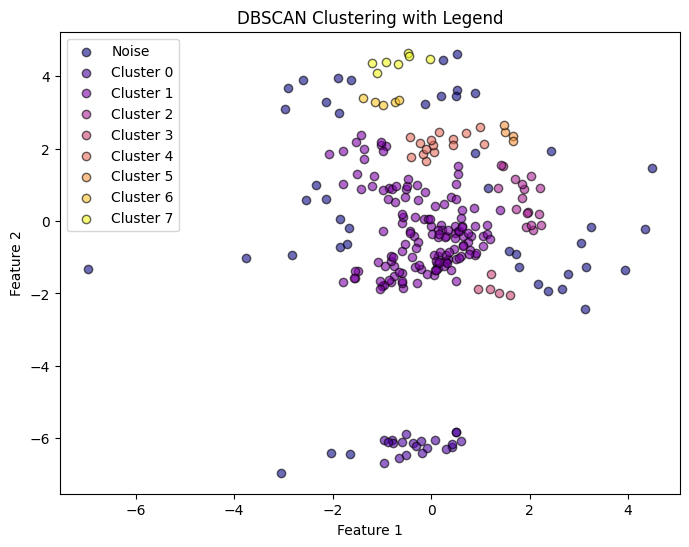

In [29]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# 執行 DBSCAN 分群
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(encoded_data)  # 每個點的群集標籤

# 取得唯一的群集標籤
unique_clusters = np.unique(clusters)

# 建立顏色對應表
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_clusters)))  # 使用 plasma colormap

plt.figure(figsize=(8, 6))

# 繪製每個群集
for cluster, color in zip(unique_clusters, colors):
    mask = clusters == cluster  # 取得當前群集的索引
    label = f"Cluster {cluster}" if cluster != -1 else "Noise"  # -1 代表雜訊
    plt.scatter(encoded_data[mask, 0], encoded_data[mask, 1], c=[color], label=label, alpha=0.6, edgecolors='k')

# 加上圖例
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering with Legend")
plt.show()
